<a href="https://colab.research.google.com/github/surajsrivathsa/applied_statistics/blob/main/Statistical_Thinking_Correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics alone cannot conclude any final result. The tests we do are based on relative likelyhood 

* Relationship between features could be linear, non-linear or monotonic or no relationship at all. 

* There is also strength of relationships and how to assess them. 

* Ploynomials and segmentation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats


* fico score between 500-850, Used to measure credit worthiness.

* Usually banks give credit to fico_score > 650 and have lower interest rate. Subprime loans are lent to people < 650 with higher interest rate.

* default rate is how many customers inside each bucket has defaulted. Usually higher for people with less fico score.

loan_total, fico_score are categorical and rest of them continous. If there are too many categories then treat it as continous variables

In [3]:
loan_df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/loan_analysis_summary.csv")
loan_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,3585,3183,19.737013,13660.71827,55000,63396.10292,15.352285,2.463470,0.520266
1,510,8223,7191,19.747810,13889.67226,56000,65446.52263,15.440212,5.565445,1.175378
2,520,9792,8370,20.085761,14186.13920,58728,68261.38708,15.312451,6.477927,1.368087
3,530,10984,9254,20.253199,14487.00838,60000,69041.52340,15.449011,7.162095,1.512578
4,540,12333,10127,20.770446,14756.36706,60000,69948.95243,15.271022,7.837750,1.655271


* We can see the right skewness by comparing mean annual income vs median annual income

* DTI seem to be correctly normal distribution 18 vs 19

In [4]:
loan_df.describe()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,675.000000,16994.527778,3589.111111,18.790417,15088.569697,65678.583333,77391.960108,12.520384,2.777778,0.586645
std,105.356538,11917.752515,3512.765608,1.690671,1633.584599,6846.614297,8038.473538,2.560128,2.718690,0.574166
min,500.000000,124.000000,3.000000,14.676210,12994.231600,55000.000000,63396.102920,7.585562,0.002322,0.000490
25%,587.500000,10452.750000,214.250000,17.650570,14038.181180,61297.500000,72364.301710,10.453639,0.165818,0.035019
50%,675.000000,12519.500000,2886.500000,19.083851,14857.024775,63000.000000,74919.065440,13.556549,2.233995,0.471802
75%,762.500000,23774.500000,6123.750000,20.165171,15353.673887,68250.000000,80706.824483,14.732548,4.739451,1.000935
max,850.000000,40444.000000,10164.000000,20.974137,20082.459680,83750.000000,98683.805750,15.449011,7.866386,1.661319


* Most of the practical data don't have perfect linear or polynomial relationship everything is approximated.

* Covariance measures direction of relationship rather than strength, they are not standardized values(range between + inf to -inf).

* Value of perfect value of cov purely depends of data and cannot be pinpointed on any single measure, Hence we need correlation too

In [5]:
loan_df.cov()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,11100.000000,8.431757e+04,-3.281917e+05,-164.562715,1.179751e+05,6.540867e+05,7.851304e+05,-261.372425,-254.002627,-53.643365
loan_total,84317.571429,1.420328e+08,-6.117364e+06,2841.802408,-9.263903e+06,-1.233279e+07,-9.045332e+06,3454.737681,-4734.508923,-999.891190
default_total,-328191.714286,-6.117364e+06,1.233952e+07,5018.669412,-2.542762e+06,-1.726291e+07,-2.094780e+07,7646.662485,9550.122450,2016.911035
dti,-164.562715,2.841802e+03,5.018669e+03,2.858369,-2.164641e+03,-1.040763e+04,-1.219916e+04,4.167275,3.884179,0.820308
avg_loan_amnt,117975.085123,-9.263903e+06,-2.542762e+06,-2164.640693,2.668599e+06,9.564547e+06,1.092982e+07,-3359.878600,-1967.960087,-415.617751
median_annual_inc,654086.714286,-1.233279e+07,-1.726291e+07,-10407.631551,9.564547e+06,4.687613e+07,5.457827e+07,-16564.670539,-13360.560742,-2821.645746
avg_annual_inc,785130.353840,-9.045332e+06,-2.094780e+07,-12199.161949,1.092982e+07,5.457827e+07,6.461706e+07,-19471.216732,-16212.465719,-3423.945732
int_rate,-261.372425,3.454738e+03,7.646662e+03,4.167275,-3.359879e+03,-1.656467e+04,-1.947122e+04,6.554256,5.918103,1.249857
default_rate,-254.002627,-4.734509e+03,9.550122e+03,3.884179,-1.967960e+03,-1.336056e+04,-1.621247e+04,5.918103,7.391278,1.560980
actual_default_rate,-53.643365,-9.998912e+02,2.016911e+03,0.820308,-4.156178e+02,-2.821646e+03,-3.423946e+03,1.249857,1.560980,0.329667


Corelation provides strenght of the relationship.

* People with high fico score have low default, dti, intrest rate and high annual income.

In [6]:
loan_df.corr()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.067153,-0.886782,-0.923870,0.685468,0.906772,0.927058,-0.969029,-0.886782,-0.886782
loan_total,0.067153,1.000000,-0.146124,0.141039,-0.475837,-0.151144,-0.094418,0.113229,-0.146124,-0.146124
default_total,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000
dti,-0.923870,0.141039,0.845046,1.000000,-0.783764,-0.899118,-0.897630,0.962789,0.845046,0.845046
avg_loan_amnt,0.685468,-0.475837,-0.443113,-0.783764,1.000000,0.855159,0.832335,-0.803379,-0.443113,-0.443113
median_annual_inc,0.906772,-0.151144,-0.717776,-0.899118,0.855159,1.000000,0.991677,-0.945029,-0.717776,-0.717776
avg_annual_inc,0.927058,-0.094418,-0.741849,-0.897630,0.832335,0.991677,1.000000,-0.946145,-0.741849,-0.741849
int_rate,-0.969029,0.113229,0.850278,0.962789,-0.803379,-0.945029,-0.946145,1.000000,0.850278,0.850278
default_rate,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000
actual_default_rate,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000


Pearson vs Spearman

Pearson for srong linear relationship and both vars must be normally distributed.

Spearman rank correlation non parametric test used to measure degree of association between two variables. Evaluates monotonic relation between continous and ordinal variable(like fico score bucket). It doesn't have any assumption on underlying distribution of data.



In [8]:
loan_df.corr(method="spearman")

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.043243,-0.939511,-0.936422,0.661261,0.956772,0.966281,-0.997169,-0.939511,-0.939511
loan_total,0.043243,1.000000,0.077992,0.029344,-0.344916,0.035934,0.048649,-0.035006,0.077992,0.077992
default_total,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.889429,-0.899871,0.950322,1.000000,1.000000
dti,-0.936422,0.029344,0.967310,1.000000,-0.576577,-0.877666,-0.890862,0.937709,0.967310,0.967310
avg_loan_amnt,0.661261,-0.344916,-0.601544,-0.576577,1.000000,0.750476,0.711969,-0.656371,-0.601544,-0.601544
median_annual_inc,0.956772,0.035934,-0.889429,-0.877666,0.750476,1.000000,0.979263,-0.955868,-0.889429,-0.889429
avg_annual_inc,0.966281,0.048649,-0.899871,-0.890862,0.711969,0.979263,1.000000,-0.966795,-0.899871,-0.899871
int_rate,-0.997169,-0.035006,0.950322,0.937709,-0.656371,-0.955868,-0.966795,1.000000,0.950322,0.950322
default_rate,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.889429,-0.899871,0.950322,1.000000,1.000000
actual_default_rate,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.889429,-0.899871,0.950322,1.000000,1.000000


Slightly right skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


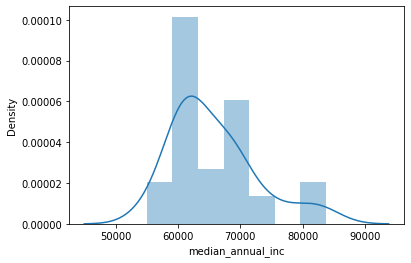

In [11]:
sns.distplot(a=loan_df["median_annual_inc"], hist=True)

Strong positive relationship between fico score and (int_rate, dti, annual income). Approximately linear

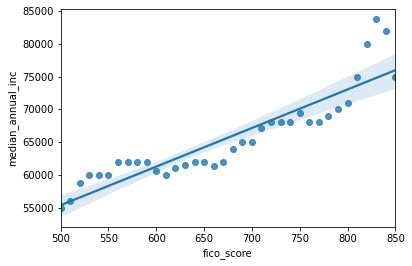

In [13]:
sns.regplot(x="fico_score", y="median_annual_inc", data=loan_df)

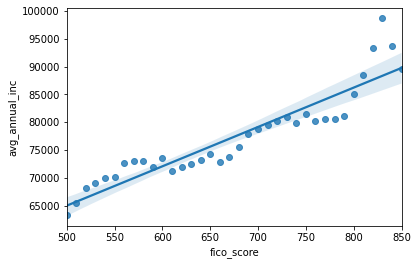

In [15]:
sns.regplot(x="fico_score", y="avg_annual_inc", data=loan_df)

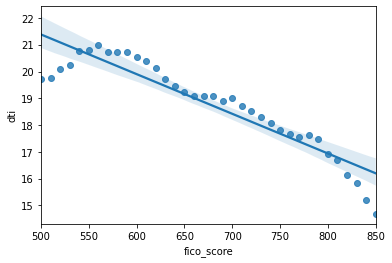

In [16]:
sns.regplot(x="fico_score", y="dti", data=loan_df)

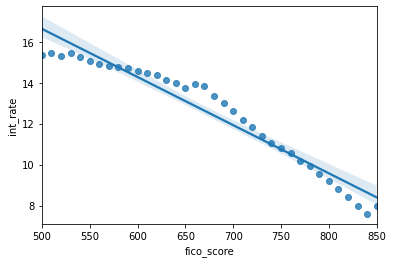

In [17]:
sns.regplot(x="fico_score", y="int_rate", data=loan_df)

Probability plot or Q-Q plot considers quartiles at both ends.

If all the points lie on the straight line then its perfectly normal. Features like height , weight , age and other bio markers are usually normal distributed but others are not

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([ 7.58556196,  7.96854839,  8.00050755,  8.40436779,  8.81612608,
          9.17925418,  9.54207879,  9.94439109, 10.17342593, 10.54704384,
         10.83639354, 11.07060021, 11.40585966, 11.84989813, 12.19602541,
         12.64158738, 12.99737662, 13.36212073, 13.75097687, 13.84232878,
         13.93910593, 13.99130432, 14.13094166, 14.38872081, 14.45885661,
         14.56445333, 14.71287103, 14.79158065, 14.83095961, 14.93735761,
         15.04

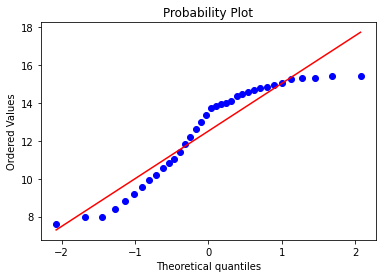

In [18]:
stats.probplot(loan_df["int_rate"], dist="norm", plot=plt)

* The correlation shows almost no relation ship existing

* Data is very curvy in reg plot and shows no linear relation ship. Maybe requires polynomial or complex model.

* Looks like 4th order polynomial. Hnadled in next class on polynomial modelling

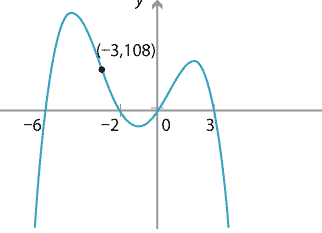

In [22]:
loan_df[["fico_score", "loan_total"]].corr()

,fico_score,loan_total
fico_score,1.000000,0.067153
loan_total,0.067153,1.000000


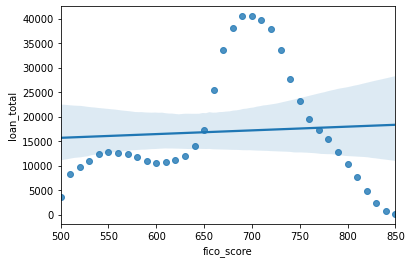

In [21]:
sns.regplot(x="fico_score", y="loan_total", data=loan_df)

There seem to be broader negative trend of fico score vs default rate. But the data is too curvy and there are too many outliers.

Data is not increasing or decreasing the same way at too many points.

Looks like monotonic relationship due to broader trend but required polynomial relationship or segmentation.

Segmentation can solve this problem. Run different models on each fico bucket.
Different models can help remove bias of common ml model that has shared coefficients across all data. This is also commonly used in regulatory practices.



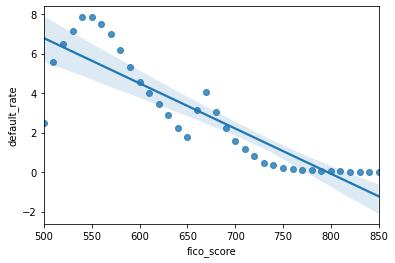

In [23]:
sns.regplot(x="fico_score", y="default_rate", data=loan_df)

More strengthedn relationship in spearman coefficinet

In [24]:
loan_df[["fico_score", "default_rate"]].corr(method="spearman")

,fico_score,default_rate
fico_score,1.000000,-0.939511
default_rate,-0.939511,1.000000


In [25]:
loan_df[["fico_score", "default_rate"]].corr(method="pearson")

,fico_score,default_rate
fico_score,1.000000,-0.886782
default_rate,-0.886782,1.000000


Extremely non linear relation. Maybe not possible even with polynomial. Also weak relationship

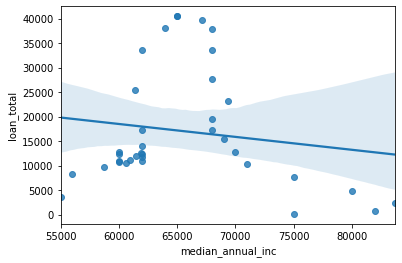

In [27]:
sns.regplot(y="loan_total", x="median_annual_inc", data=loan_df)

In [29]:
loan_df[["loan_total", "median_annual_inc"]].corr(method="spearman")

,loan_total,median_annual_inc
loan_total,1.000000,0.035934
median_annual_inc,0.035934,1.000000


No coreltaion. weak polynomial relation. Maybe 3rd order. But still missing lot of points

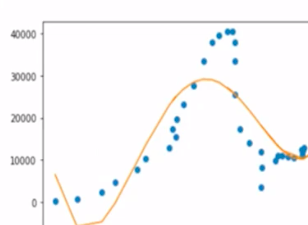

In [30]:
loan_df[["dti", "loan_total"]].corr(method="spearman")

,dti,loan_total
dti,1.000000,0.029344
loan_total,0.029344,1.000000


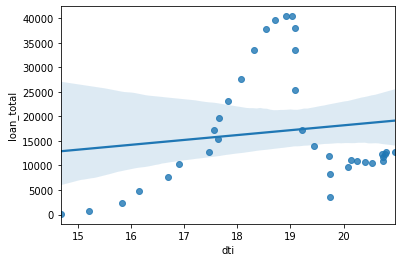

In [31]:
sns.regplot(x="dti", y="loan_total", data=loan_df)